# CareerVillage

## Problem Statement :- Building Recommendation Engine for CareerVillage

### What is CareerVillage ?

--> CareerVillage.org(CareerVillage) is a non-profit organization that helps high school students, to get career advice online from real-world professionals.

--> Professionals can then answer those questions from any laptop or smartphone, giving students the inspiration and education they need to make better decisions about their futures.
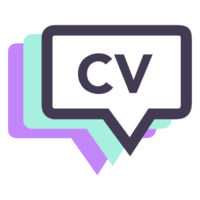

#### CareerVillage.org has provided several years of anonymized data and each file comes from a table in their database.

1). answers.csv: Answers are what this is all about! Answers get posted in response to questions. Answers can only be posted by users who are registered as Professionals. However, if someone has changed their registration type after joining, they may show up as the author of an Answer even if they are no longer a Professional.

2). comments.csv: Comments can be made on Answers or Questions. We refer to whichever the comment is posted to as the "parent" of that comment. Comments can be posted by any type of user. Our favorite comments tend to have "Thank you" in them :)

3). emails.csv: Each email corresponds to one specific email to one specific recipient. The frequency_level refers to the type of email template which includes immediate emails sent right after a question is asked, daily digests, and weekly digests.

4). group_memberships.csv: Any type of user can join any group. There are only a handful of groups so far.

5). groups.csv: Each group has a "type". For privacy reasons we have to leave the group names off.

6). matches.csv: Each row tells you which questions were included in emails. If an email contains only one question, that email's ID will show up here only once. If an email contains 10 questions, that email's ID would show up here 10 times.

7). professionals.csv: We call our volunteers "Professionals", but we might as well call them Superheroes. They're the grown ups who volunteer their time to answer questions on the site.

8). questions.csv: Questions get posted by students. Sometimes they're very advanced. Sometimes they're just getting started. It's all fair game, as long as it's relevant to the student's future professional success.

9). school_memberships.csv: Just like group_memberships, but for schools instead.

10). students.csv: Students are the most important people on CareerVillage.org. They tend to range in age from about 14 to 24. They're all over the world, and they're the reason we exist!

11). tag_questions.csv: Every question can be hashtagged. We track the hashtag-to-question pairings, and put them into this file.

12). tag_users.csv: Users of any type can follow a hashtag. This shows you which hashtags each user follows.

13). tags.csv: Each tag gets a name.

14). question_scores.csv: "Hearts" scores for each question.

15). answer_scores.csv: "Hearts" scores for each answer.

#### The relation Between Table is Show Below in ER Diagram :-

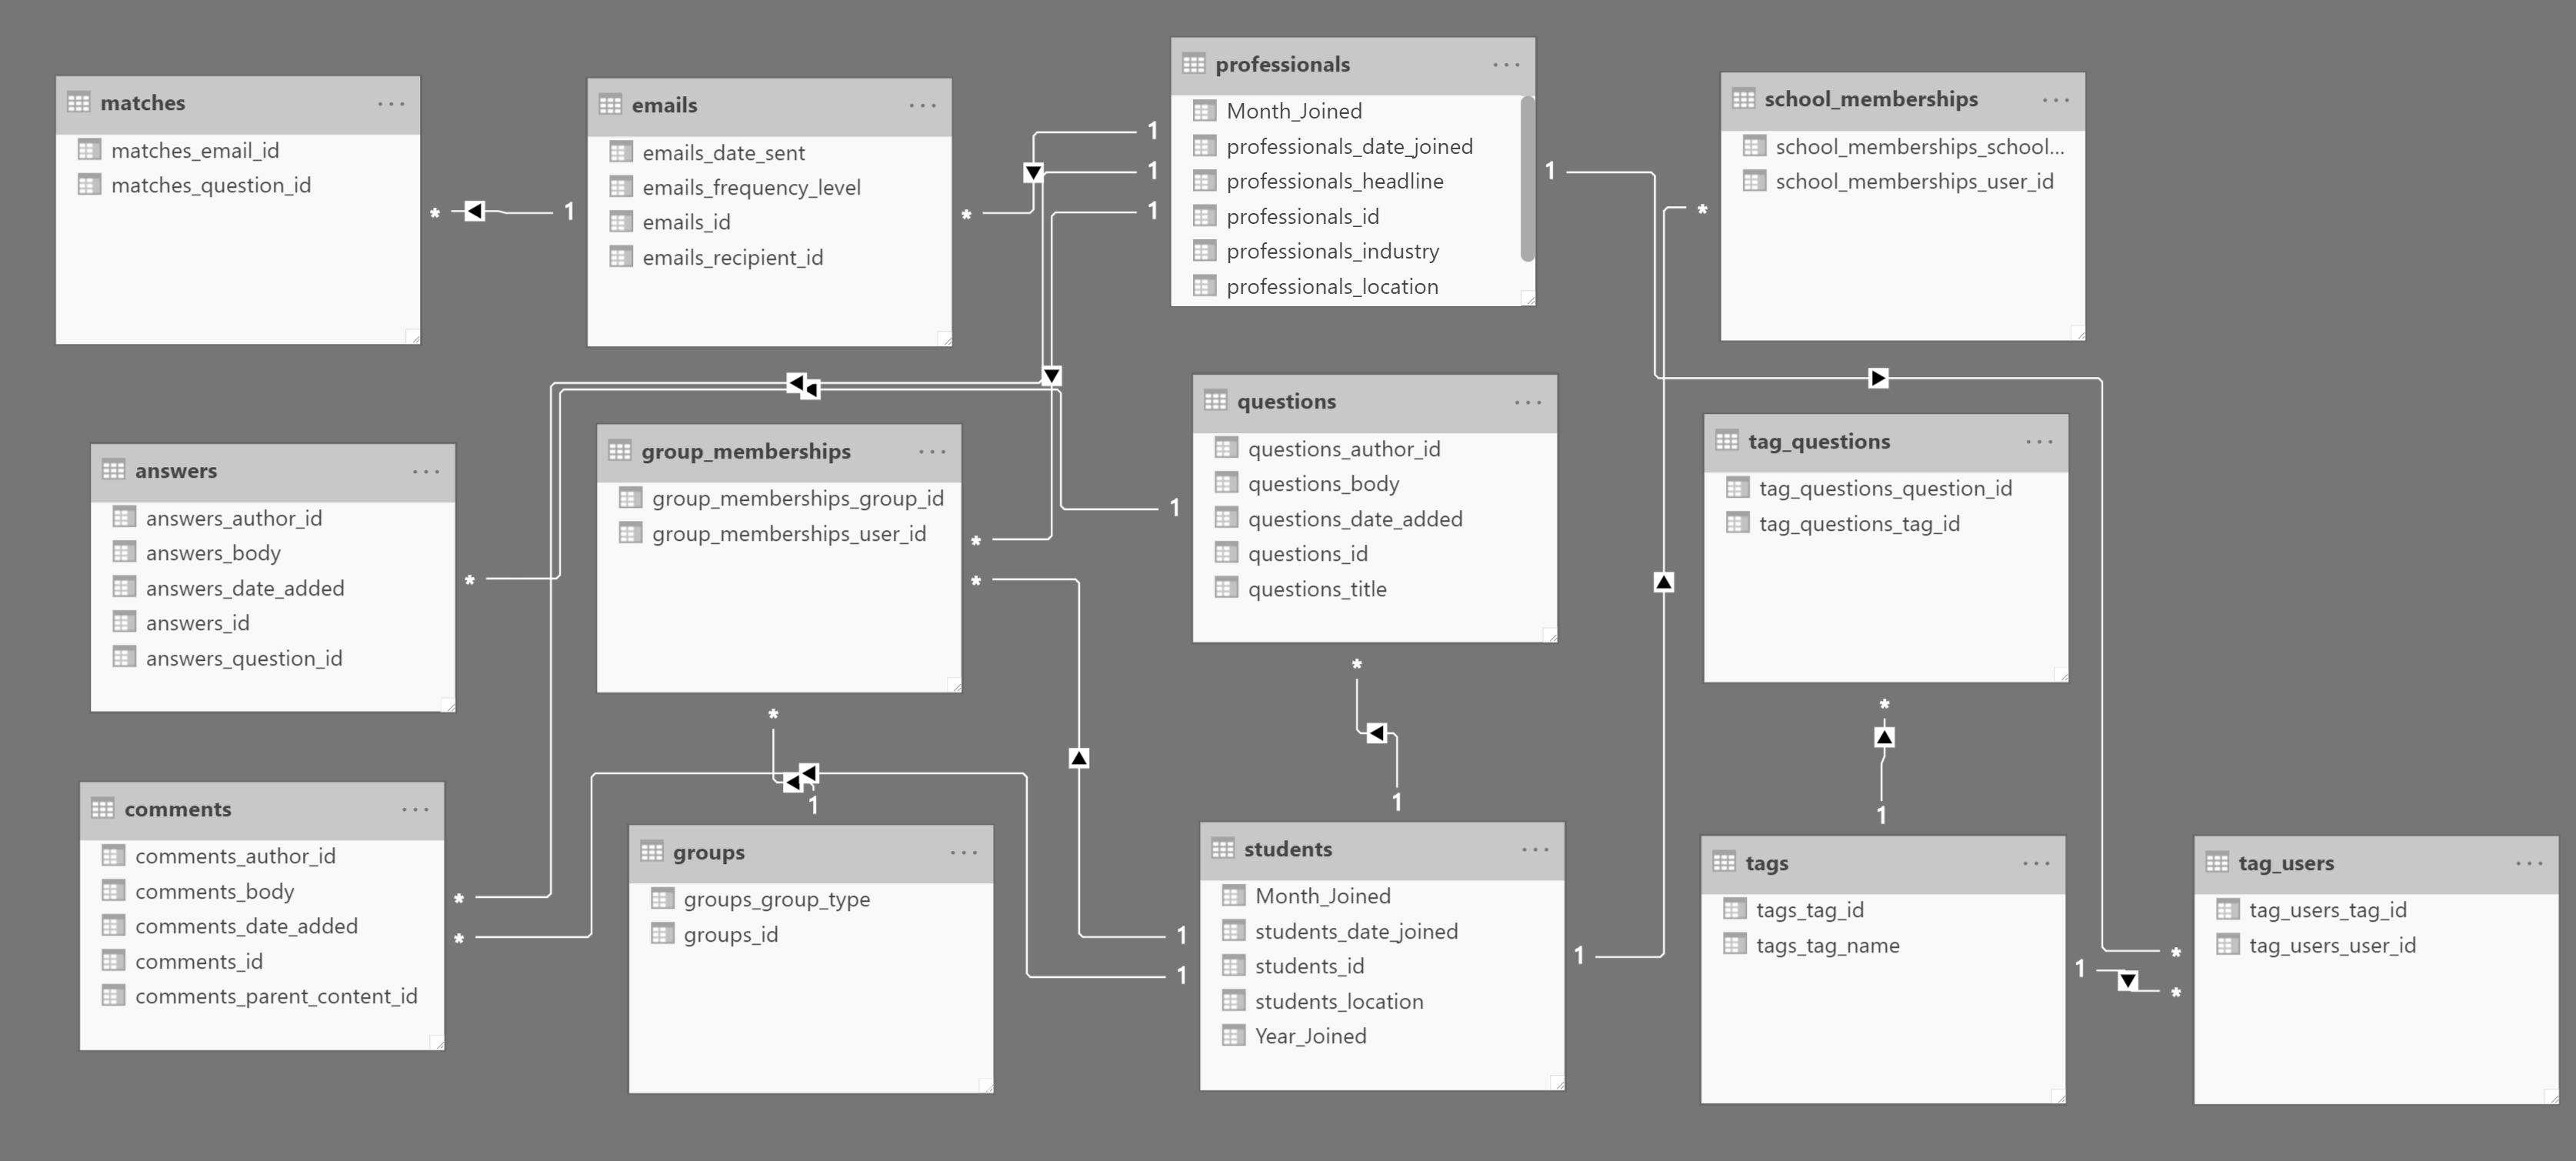

Reading Dataset

In [1]:
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
professionals = pd.read_csv('D:\professionals.csv', parse_dates = ['professionals_date_joined'])

students = pd.read_csv('D:\students.csv', parse_dates = ['students_date_joined'])

groups = pd.read_csv('D:\groups.csv')

group_memberships = pd.read_csv('D:\group_memberships.csv')

emails = pd.read_csv('D:\emails.csv', parse_dates = ['emails_date_sent'])

matches = pd.read_csv('D:\matches.csv')

questions = pd.read_csv('D:\questions.csv', parse_dates = ['questions_date_added'])

answers = pd.read_csv('D:/answers.csv', parse_dates = ['answers_date_added'])



In [3]:
tag_questions = pd.read_csv("D:/tag_questions.csv")

tags = pd.read_csv('D:/tags.csv')

tag_users = pd.read_csv('D:/tag_users.csv')

In [4]:
if (tag_users["tag_users_tag_id"] == 27490).any():
    print("Available")

Available


In [5]:
questions1 = questions.copy()
question_answers = questions1.merge(right=answers, how = 'left',
                                            left_on ='questions_id',
                                            right_on ='answers_question_id')

In [6]:
question_answers.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14+00:00,<p>Hi!</p>\n<p>You are asking a very interesti...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08+00:00,<p>Hi. I joined the Army after I attended coll...


In [7]:
question_answers = question_answers.drop(["questions_date_added","answers_date_added"],axis=1)

In [8]:
question_answers.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,<p>Hi. I joined the Army after I attended coll...


In [9]:
question_answers_1 = question_answers.copy()
question_answers_S = question_answers_1.merge(right=students, how = 'left',
                                            left_on ='questions_author_id',
                                            right_on ='students_id')


In [10]:
question_answers_S.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,students_date_joined
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32+00:00
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,<p>Hi. I joined the Army after I attended coll...,acccbda28edd4362ab03fb8b6fd2d67b,"Providence, Rhode Island",2016-05-20 16:29:08+00:00


In [11]:
professionals.head(2)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19+00:00
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21+00:00


In [12]:
professionals["professionals_location"]

0                           NaN
1                           NaN
2            New York, New York
3         Boston, Massachusetts
4                           NaN
                  ...          
28147    El Segundo, California
28148      Alexandria, Virginia
28149      Berkeley, California
28150       Houston, Texas Area
28151             Dallas, Texas
Name: professionals_location, Length: 28152, dtype: object

In [13]:
question_answers_S.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,students_date_joined
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32+00:00
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,<p>Hi. I joined the Army after I attended coll...,acccbda28edd4362ab03fb8b6fd2d67b,"Providence, Rhode Island",2016-05-20 16:29:08+00:00


In [14]:
question_answers_1z = question_answers_S.copy()
question_answers_S_PN = question_answers_1z.merge(right=professionals, how = 'left',
                                            left_on ='answers_author_id',
                                            right_on ='professionals_id')


In [15]:
question_answers_S_PN["professionals_location"]

0                        Cleveland, Ohio
1                       Atlanta, Georgia
2                New Delhi, Delhi, India
3        Woodbridge Township, New Jersey
4                    Seattle, Washington
                      ...               
51939                  Chicago, Illinois
51940           Dartmouth, Massachusetts
51941              Boston, Massachusetts
51942             California, California
51943                Wayne, Pennsylvania
Name: professionals_location, Length: 51944, dtype: object

In [16]:
question_answers_S_PN.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,students_date_joined,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32+00:00,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49+00:00
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,<p>Hi. I joined the Army after I attended coll...,acccbda28edd4362ab03fb8b6fd2d67b,"Providence, Rhode Island",2016-05-20 16:29:08+00:00,2aa47af241bf42a4b874c453f0381bd4,"Atlanta, Georgia",Telecommunications,Senior Investigator at AT&T,2018-03-23 13:43:28+00:00


In [17]:
question_answers_S_PN = question_answers_S_PN.drop(["professionals_date_joined"],axis=1)

In [18]:
# question_answers_1zz = question_answers_PN.copy()
# question_answers_PN_SN = question_answers_1zz.merge(right=students, how = 'left',
#                                             left_on ='questions_author_id',
#                                             right_on ='students_id')


In [19]:
# question_answers_PN_SN.head(2)

In [20]:
question_answers_PN_SN = question_answers_S_PN.drop(["students_date_joined"],axis=1)

In [21]:
question_answers_1zzz = question_answers_PN_SN.copy()
question_answers_PN_SN_UT = question_answers_1zzz.merge(right=tag_users, how = 'left',
                                            left_on ='answers_author_id',
                                            right_on ='tag_users_user_id')

In [22]:
question_answers_PN_SN_UT.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_tag_id,tag_users_user_id
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,129.0,36ff3b3666df400f956f8335cf53e09e
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,187.0,36ff3b3666df400f956f8335cf53e09e


In [23]:
# question_answers_PN_SN_UT = question_answers_PN_SN_UT.drop(["tag_users_user_id"],axis=1)

In [24]:
tags1 = tags.copy()
tags1["tags_tag_id"] = tags1["tags_tag_id"].astype(float)
tags1.head(2)

,tags_tag_id,tags_tag_name
0,27490.0,college
1,461.0,computer-science


In [25]:
question_answers_1zzzz = question_answers_PN_SN_UT.copy()
question_answers_PN_SN_UT_T = question_answers_1zzzz.merge(right=tags, how = 'left',
                                            left_on ='tag_users_tag_id',
                                            right_on ='tags_tag_id')


In [26]:
# question_answers_PN_SN_UT_T[question_answers_PN_SN_UT_T["professionals_id"]=='36ff3b3666df400f956f8335cf53e09e']

In [27]:
question_answers_PN_SN_UT_T.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,129.0,36ff3b3666df400f956f8335cf53e09e,129.0,career
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,187.0,36ff3b3666df400f956f8335cf53e09e,187.0,jobs


In [28]:
# students[students["students_id"]=='36ff3b3666df400f956f8335cf53e09e']

In [29]:
professionals.head(3)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19+00:00
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21+00:00
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26+00:00


In [30]:
question_answers_PN_SN_UT_T_s = question_answers_PN_SN_UT_T.copy()
question_answers_PN_SN_UT_T_s["status"] = np.where(question_answers_PN_SN_UT_T_s["answers_author_id"] == question_answers_PN_SN_UT_T_s["professionals_id"],"Professional","Student")

In [31]:
question_answers_PN_SN_UT_T_s[question_answers_PN_SN_UT_T_s["status"]=="Professional"]

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name,status
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,129.0,36ff3b3666df400f956f8335cf53e09e,129.0,career,Professional
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,187.0,36ff3b3666df400f956f8335cf53e09e,187.0,jobs,Professional
2,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,54.0,36ff3b3666df400f956f8335cf53e09e,54.0,engineering,Professional
3,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,27332.0,36ff3b3666df400f956f8335cf53e09e,27332.0,career-choice,Professional
4,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,27490.0,36ff3b3666df400f956f8335cf53e09e,27490.0,college,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426922,1b1ebe9afc5046ccbb328704e88e5cc0,d233c9936cd64363877ffea1feb10c35,Is age a factor for hiring entry level compute...,I am in my mid thirties with a Bachelor's degr...,563bc22e715e42bfb4b6ef9c3a95fb23,5750e3d592cd4b0486ec4e7eb01c29ad,1b1ebe9afc5046ccbb328704e88e5cc0,<p>This is a great question.</p>\n<p>For many ...,d233c9936cd64363877ffea1feb10c35,"London, England, United Kingdom",5750e3d592cd4b0486ec4e7eb01c29ad,"Wayne, Pennsylvania",Information Technology and Services,"Director, Mobile Engineering and Architecture ...",11261.0,5750e3d592cd4b0486ec4e7eb01c29ad,11261.0,mobile-app,Professional
426923,1b1ebe9afc5046ccbb328704e88e5cc0,d233c9936cd64363877ffea1feb10c35,Is age a factor for hiring entry level compute...,I am in my mid thirties with a Bachelor's degr...,563bc22e715e42bfb4b6ef9c3a95fb23,5750e3d592cd4b0486ec4e7eb01c29ad,1b1ebe9afc5046ccbb328704e88e5cc0,<p>This is a great question.</p>\n<p>For many ...,d233c9936c

In [32]:
question_answers_PN_SN_UT_T_s[question_answers_PN_SN_UT_T_s["status"]=="Student"]

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name,status
143,e214acfbe6644d65b889a3268828db9d,16908136951a48ed942738822cedd5c2,what does it take to be an anesthesiologist?,I am a sophomore who is interested in learning...,3d56d36b5e644d079d0d7ada4bdcddcf,b1776598991649088c0a00a6e0a2c766,e214acfbe6644d65b889a3268828db9d,<ul>\n<li>\n<p>4 years of college</p>\n</li>\n...,16908136951a48ed942738822cedd5c2,"Palm Harbor, Florida",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
572,dab7b240dc394d30a54dd0c5862d5fe3,b44d6b1b71ca4fd2add01d4b922a7b12,Are there any resume items which would make my...,"I am active in community service, extracurricu...",NaN,NaN,NaN,NaN,b44d6b1b71ca4fd2add01d4b922a7b12,"Ocean Springs, Mississippi",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
1044,8bb567b6a29a458db7ee9dafad0354d6,329b5b76e744489da39287082339f7ad,Is there certain schools for Journalism?,#college-choice #college #colleges #journalism,NaN,NaN,NaN,NaN,329b5b76e744489da39287082339f7ad,"Pawnee, Oklahoma",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
1082,57177cb0fab64a85b5200893691ad751,4ef20e377e45443e99a9768992d5eb0e,when is the most beneficial time to sign for s...,#strategy,NaN,NaN,NaN,NaN,4ef20e377e45443e99a9768992d5eb0e,"Lexington, Kentucky",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
1229,a5b3aa8cfc5e467cae51fa66c3564733,e9a7bc62ff014dc1b2111202587d7faf,What is the best studing tip for AP tests?,#studying-tips #college #prep,NaN,NaN,NaN,NaN,e9a7bc62ff014dc1b2111202587d7faf,"Mechanicsville, Virginia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425824,796f2eada4b5472ca701f6e6c7e1d082,7f0188f4a38f4408ade18c7158a6da37,What degree helps you get a better chance to g...,I wanted to know which degree will be more con...,ab1d920e5c99495884179c33d27f2bfd,e44c2855fd6649ae869fe145d167cbe4,796f2eada4b5472ca701f6e6c7e1d082,"<p>Hey Wendy,</p><p><br></p><p>Congratulations...",7f0188f4a38f4408ade18c7158a6da37,"Kankakee, Illinois",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
426449,12b3e98f9ef34002ba17df1d94484d36,1b810422e20a47648aade0463f0e8738,On average how much do lawyers make a year in ...,I would like to know this because I am interes...,afde6db0aef045af9e7ad1892fadbf83,05444a2f42454327b2ac4b463c0adbe0,12b3e98f9ef34002ba17df1d94484d36,<p>Hi Matthew! Great to see you preparing for ...,1b810422e20a47648aade0463f0e8738,"San Jose, California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
426817,7df38c9ded4a4474bb4f9c1f659e1ad1,6ab792d625e14eb2abc14f9a57a450aa,What major do I need to study to be a writer,I am a high school junior and for awhile now I...,fb05e74dafc94f5ab2d9da627a882349,53939a491acb42a4815463845a638186,7df38c9ded4a4474bb4f9c1f659e1ad1,"Hi Sofia, \n\nTo become a writer you should ma...",6ab792d625e14eb2abc14f9a57a450aa,"La Mirada, California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student
426847,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,Which careers are good if I enjoy working with...,"I have been volunteering, and I have found tha...",21910e89165047259510026f5d86368e,392a273cb57b42389ec01a8fcdaff3af,63c89317413046f483020585f0cc8dc4,<p>Traditional careers where you work with kid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student


In [33]:
question_answers_PN_SN_UT_T_s.shape

(426927, 19)

In [34]:
question_answers_PN_SN_UT_T_s.head(2)

,questions_id,questions_author_id,questions_title,questions_body,answers_id,answers_author_id,answers_question_id,answers_body,students_id,students_location,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_tag_id,tag_users_user_id,tags_tag_id,tags_tag_name,status
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,129.0,36ff3b3666df400f956f8335cf53e09e,129.0,career,Professional
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,Teacher career question,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,<p>Hi!</p>\n<p>You are asking a very interesti...,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,187.0,36ff3b3666df400f956f8335cf53e09e,187.0,jobs,Professional


In [35]:
Asked_Changes = question_answers_PN_SN_UT_T_s[["questions_id","questions_author_id","answers_author_id","answers_question_id","students_id","students_location","tags_tag_id","questions_body","questions_title","professionals_id","professionals_location","tags_tag_name","answers_body","status","professionals_industry","professionals_headline"]]

In [36]:
Asked_Changes.head(2)

,questions_id,questions_author_id,answers_author_id,answers_question_id,students_id,students_location,tags_tag_id,questions_body,questions_title,professionals_id,professionals_location,tags_tag_name,answers_body,status,professionals_industry,professionals_headline
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",129.0,What is a maths teacher? what is a ma...,Teacher career question,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",career,<p>Hi!</p>\n<p>You are asking a very interesti...,Professional,Mental Health Care,Assist with Recognizing and Developing Potential
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",187.0,What is a maths teacher? what is a ma...,Teacher career question,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",jobs,<p>Hi!</p>\n<p>You are asking a very interesti...,Professional,Mental Health Care,Assist with Recognizing and Developing Potential


In [37]:
# Asked_Changes["tags_tag_name"]

In [38]:
# Asked_Changes=Asked_Changes.fillna("Not Available")

In [39]:
Asked_Changes.head(2)

,questions_id,questions_author_id,answers_author_id,answers_question_id,students_id,students_location,tags_tag_id,questions_body,questions_title,professionals_id,professionals_location,tags_tag_name,answers_body,status,professionals_industry,professionals_headline
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",129.0,What is a maths teacher? what is a ma...,Teacher career question,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",career,<p>Hi!</p>\n<p>You are asking a very interesti...,Professional,Mental Health Care,Assist with Recognizing and Developing Potential
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",187.0,What is a maths teacher? what is a ma...,Teacher career question,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",jobs,<p>Hi!</p>\n<p>You are asking a very interesti...,Professional,Mental Health Care,Assist with Recognizing and Developing Potential


In [40]:
Asked_Changes.to_csv("Task3.csv")

In [41]:
Asked_Changes = pd.read_csv("Task3.csv")

In [42]:
Asked_Changes = Asked_Changes.drop(["Unnamed: 0"],axis=1)

In [43]:
# Asked_Changes["professionals_id"]

#### Here we are having Question , who asked it (students_id) , there location of post,Tags given by default CareerVillage engine, question body asked by student,question title given by CareerVillage engine, Now most interesting part if professional dont answer the question ,then CareerVillage engine recommend answer by default to students. Thats why there is no professional details given but answer came up with its body.
#### Thats what CareerVillage is in Progress. Because it dont wait for professional response thats why the complete Dataset is imbalanced in nature.

In [44]:
#Function to show data labels on chart
# Taken help From kaggle https://www.kaggle.com/parselt/career-village
def add_value_labels(ax, cntin, spacing=1):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if cntin=='K':
            label = "{:.2f}".format(y_value/1000)+"K"
        else:
            label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [45]:
students.head(2)

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24+00:00
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44+00:00


In [46]:
print("Number of Unique Locations for Professionals - " + str(professionals.professionals_location.nunique()))

Number of Unique Locations for Professionals - 2582


In [47]:
print("Number of Unique Locations for Students - " + str(students.students_location.nunique()))

Number of Unique Locations for Students - 5480


#### Unique location's for Students are 5480 and for Professionals are 2582

In [48]:
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24+00:00
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44+00:00
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00+00:00
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00+00:00
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00+00:00


In [49]:
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32+00:00,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54+00:00,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [50]:
print("Number of location where questions originated -  ", len(students.students_location))

Number of location where questions originated -   30971


#### In CareerVillage questions where originated from student's.

In [51]:
print("Top 3 locations for answering the questions - \n" , professionals.professionals_location.value_counts().sort_values(ascending=True).tail(3))

Top 3 locations for answering the questions - 
 professionals_location
Greater New York City Area     745
California, California         864
New York, New York            1337
Name: count, dtype: int64


#### Top 3 Location's for answer belongs to highly active professional's stream location 

In [52]:
print("Count of professionals and columns - " + str(professionals.shape))
print("Unique Industries - " + str(professionals.professionals_industry.nunique()))
print("Missing values in Industry - " + str(professionals.professionals_industry.isna().sum()))
print("Unique Locations - " + str(professionals.professionals_location.nunique()))
print("Missing values in Location - " + str(professionals.professionals_location.isna().sum()))

Count of professionals and columns - (28152, 5)
Unique Industries - 2469
Missing values in Industry - 2577
Unique Locations - 2582
Missing values in Location - 3098


#### Professionals Detail :-
#### Total Professionals: 28152
#### Industries they belong to: 2470
#### Tagged to Unknown Industries: 2576
#### Locations they belong to: 2582
#### Tagged to Unknown Locations: 3098

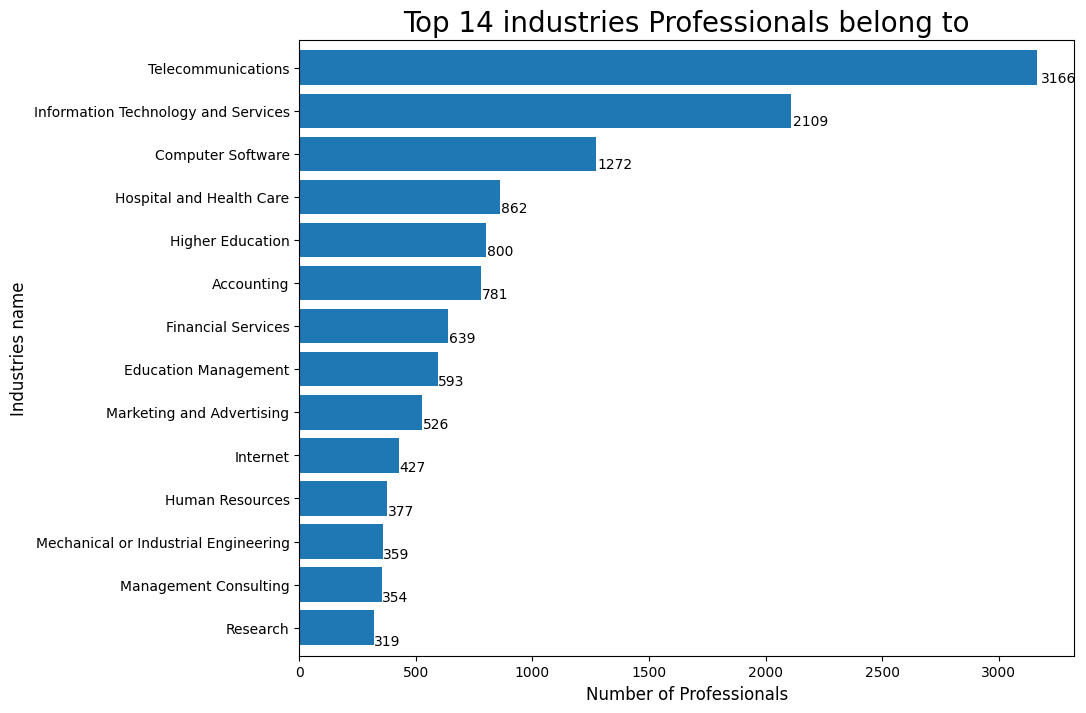

In [53]:
professionals_industries = professionals.professionals_industry.value_counts().sort_values(ascending=True).tail(14)
ax = professionals_industries.plot(kind='barh',figsize=(10, 8),width=0.8) 
ax.set_title("Top 14 industries Professionals belong to", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Industries name', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

#### As you Can see, Most of the professionals are from Telecommunication , IT Services , Computer Software field.
##### In 1st position Telecommunication with 3166 Professionals.
##### 2nd position IT Services with 2109 Professionals.
##### 3rd position Computer Software field with 1272 Professionals.
##### And so on...

In [54]:
# professionals_locations = professionals.professionals_location.value_counts().sort_values(ascending=True).tail(14)
# ax = professionals_locations.plot(kind='barh',figsize=(10, 8),width=0.8) 
# ax.set_title("Top 14 Locations Professionals belong to", fontsize=20)
# ax.set_xlabel('Number of Professionals', fontsize=12)
# for p in ax.patches:
#      ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

In [55]:
import datetime
df_profs = professionals.copy()
df_profs['YearJoined']=df_profs['professionals_date_joined'].dt.year
prof_yrjoined = df_profs.groupby('YearJoined').count()
prof_yrjoined = prof_yrjoined.drop ('professionals_id',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_location',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_industry',axis=1)
prof_yrjoined = prof_yrjoined.drop ('professionals_headline',axis=1)
prof_yrjoined = prof_yrjoined.rename(columns={'professionals_date_joined':'Count'})

prof_yrjoined.head()

,Count
YearJoined,
2011,57
2012,222
2013,429
2014,987
2015,1540


#### Date of Joining(in Year) of Professionals with Counts

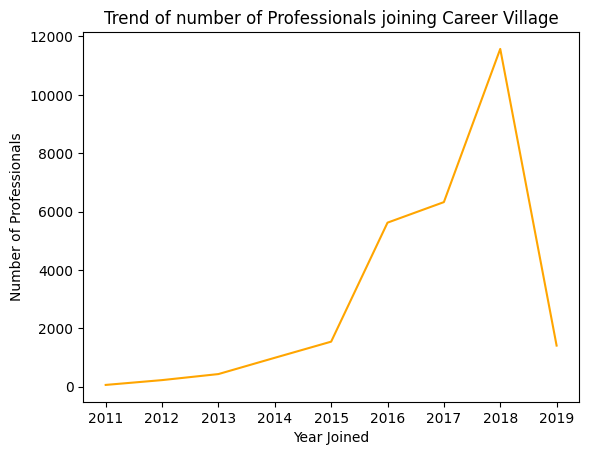

In [56]:
plt.plot(prof_yrjoined, color='orange')
plt.xlabel('Year Joined')
plt.ylabel('Number of Professionals')
plt.title('Trend of number of Professionals joining Career Village')
plt.show()

#### By Observations , Since majority have joined from year 2016 to year 2018, it would be good to know the industry wise count in these years

In [57]:
import datetime
df_profs = professionals.copy()
df_profs['YearJoined']=df_profs['professionals_date_joined'].dt.year
prof_yrjoined = df_profs[df_profs['YearJoined'].isin(['2016','2017','2018'])][['YearJoined','professionals_industry','professionals_date_joined']].groupby(['YearJoined','professionals_industry']).count()

prof_yrjoined=prof_yrjoined[prof_yrjoined['professionals_date_joined'] > 109]
prof_yrjoined = prof_yrjoined.rename(columns={'professionals_date_joined':'Count'})
df_profscopy = prof_yrjoined.unstack()
df_profscopy.plot(kind='barh', stacked=True, figsize=[16,6])

TypeError: no numeric data to plot

#### In year 2018 Telecommunication were at top

#### In year 2017 IT Services were at top

#### In year 2016  IT Services were at top
#### in INDUSTRY LEVEL

In [58]:
import datetime
df_profs = professionals.copy()
df_profs['YearJoined']=df_profs['professionals_date_joined'].dt.year
df_profs['Count'] = df_profs[df_profs['YearJoined'].isin(['2016','2017','2018'])][['YearJoined','professionals_industry','professionals_date_joined']].groupby(['YearJoined','professionals_industry']).transform('count')

prof_yrjoined=df_profs[df_profs['Count'] > 109][['YearJoined','professionals_industry','Count']].drop_duplicates()

group_size=prof_yrjoined.groupby('YearJoined').count()['Count'].tolist()
group_names=prof_yrjoined['YearJoined'].unique().tolist()
subgroup_names=prof_yrjoined['professionals_industry'].tolist()
subgroup_size=prof_yrjoined['Count'].tolist()

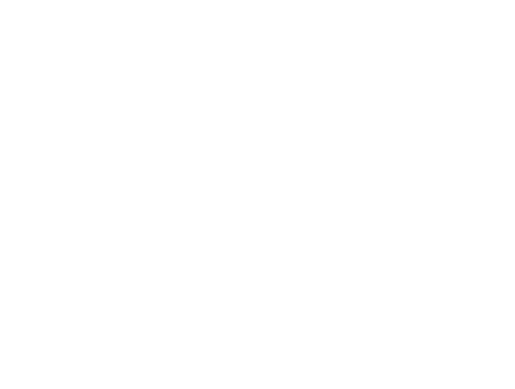

In [59]:
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3.5-0.3, labels=subgroup_names, labeldistance=0.8, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

#### Observation: 
##### Telecommunications in 2018
##### IT Services in 2016
##### and Hospital and Health Care in 2017 were the more to joined Career Village

In [60]:
print("Count of Students and columns - " + str(students.shape))
print("Unique Locations - " + str(students.students_location.nunique()))
print("Missing values in Location - " + str(students.students_location.isna().sum()))

Count of Students and columns - (30971, 3)
Unique Locations - 5480
Missing values in Location - 2033


#### From above , we can observe that Students
##### Total Students: 30,971
##### Locations they belong to: 5,480
##### Tagged to Unknown Locations: 2,033

In [61]:
import datetime
df_students = students.copy()
df_students['YearJoined']=df_students['students_date_joined'].dt.year
student_yrjoined = df_students.groupby('YearJoined').count()
student_yrjoined = student_yrjoined.drop ('students_id',axis=1)
student_yrjoined = student_yrjoined.drop ('students_location',axis=1)
student_yrjoined = student_yrjoined.rename(columns={'students_date_joined':'Count'})

student_yrjoined.head()

,Count
YearJoined,
2011,2
2012,453
2013,570
2014,1722
2015,2576


#### Date of Joining(in Year) of Students with Counts

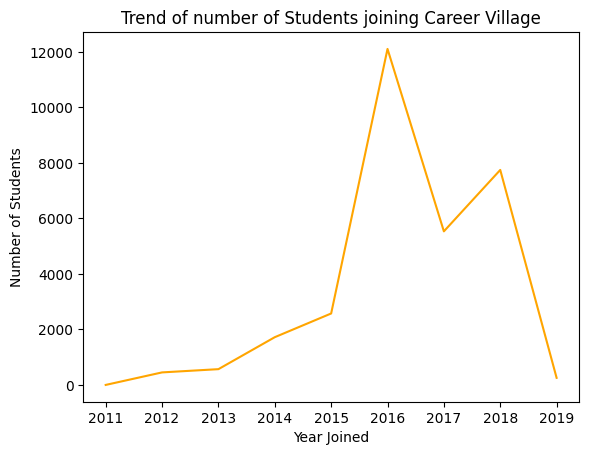

In [62]:
plt.plot(student_yrjoined, color='orange')
plt.xlabel('Year Joined')
plt.ylabel('Number of Students')
plt.title('Trend of number of Students joining Career Village')
plt.show()

#### Most of the Students joined to CareerVillage in 2016

#### Which means before 2016 was having Blackout of Career Guidance and also the proper Job/Work Support. 

In [63]:
# students_locations = students.students_location.value_counts().sort_values(ascending=True).tail(14)
# ax = students_locations.plot(kind='barh',figsize=(10, 8),width=0.8) 
# ax.set_title("Top 14 Locations Students belong to", fontsize=20)
# ax.set_xlabel('Number of Professionals', fontsize=12)

# for p in ax.patches:
#      ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

In [64]:
group_det = group_memberships.join(groups, how = 'inner').groupby('groups_group_type').count()
group_det = group_det.drop ('group_memberships_user_id',axis=1)
group_det = group_det.drop ('groups_id',axis=1)
group_det = group_det.rename(columns={'group_memberships_group_id':'Count'})
print(group_det)
print("Total Groups :-         ",group_det['Count'].sum())

                      Count
groups_group_type          
cause                     2
club                      1
competition               1
interest group            1
mentorship program        3
professional network      8
youth program            33
Total Groups :-          49


#### Total Groups  were :-          49

In [65]:
prof_grp = professionals.merge(group_memberships, how = 'left',
                                            left_on ='professionals_id',
                                            right_on ='group_memberships_user_id')

prof_grp = pd.merge(groups, prof_grp, how='inner',
                left_on ='groups_id',
                right_on ='group_memberships_group_id')

prof_grp=prof_grp.groupby('groups_group_type').count()

prof_grp = prof_grp.rename(columns={'group_memberships_group_id':'Professionals_Count'})
prof_grp[['Professionals_Count']]

St_grp = students.merge(group_memberships, how = 'left',
                                            left_on ='students_id',
                                            right_on ='group_memberships_user_id')

St_grp = pd.merge(groups, St_grp, how='inner',
                left_on ='groups_id',
                right_on ='group_memberships_group_id')

St_grp=St_grp.groupby('groups_group_type').count()

St_grp = St_grp.rename(columns={'group_memberships_group_id':'Students_Count'})
St_grp[['Students_Count']]
allingrp=prof_grp[['Professionals_Count']].join(St_grp[['Students_Count']], how='inner')
print(allingrp)
print("\n")
print(prof_grp[['Professionals_Count']].sum())
print(St_grp[['Students_Count']].sum())

                      Professionals_Count  Students_Count
groups_group_type                                        
cause                                 161              71
club                                   12              10
competition                             3               1
interest group                          9               4
mentorship program                     17               5
professional network                   64              28
youth program                         461             192


Professionals_Count    727
dtype: int64
Students_Count    311
dtype: int64


In [66]:
atag = pd.merge(answers, tag_questions, how = 'inner',
                                            left_on ='answers_question_id',
                                            right_on ='tag_questions_question_id')
print('Number of total tags are ' + str(len(atag)) + ' for ' + str(len(atag.answers_id.unique())) + ' questions')

Number of total tags are 176350 for 49437 questions


#### Tags

##### Number of total tags are 176350 for 49437 questions

In [67]:
qtag = pd.merge(pd.merge(questions, tag_questions, how='inner',
                                           left_on = 'questions_id',
                                           right_on = 'tag_questions_question_id'),
                                                tags, how='inner',
                                                left_on='tag_questions_tag_id',
                                                right_on='tags_tag_id')
ptag = pd.merge(pd.merge(professionals, tag_users, how='inner',
                                           left_on = 'professionals_id',
                                           right_on = 'tag_users_user_id'),
                                                tags, how='inner',
                                                left_on='tag_users_tag_id',
                                                right_on='tags_tag_id')
qtag=qtag.groupby('tags_tag_name').count()
ptag=ptag.groupby('tags_tag_name').count()
qtag = qtag.rename(columns={'tag_questions_question_id':'TagsInQuestions'})
ptag = ptag.rename(columns={'tag_users_user_id':'TagsFollowedByProfessionals'})
tagcounts=qtag[['TagsInQuestions']].join(ptag[['TagsFollowedByProfessionals']], how='inner')
tagcounts=tagcounts[(tagcounts['TagsInQuestions'] > 100) & (tagcounts['TagsFollowedByProfessionals'] > 100)]
tagcounts=tagcounts.sort_values(by=['TagsInQuestions'], ascending=False)
taglist=tagcounts.index[:].tolist()

In [68]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rc

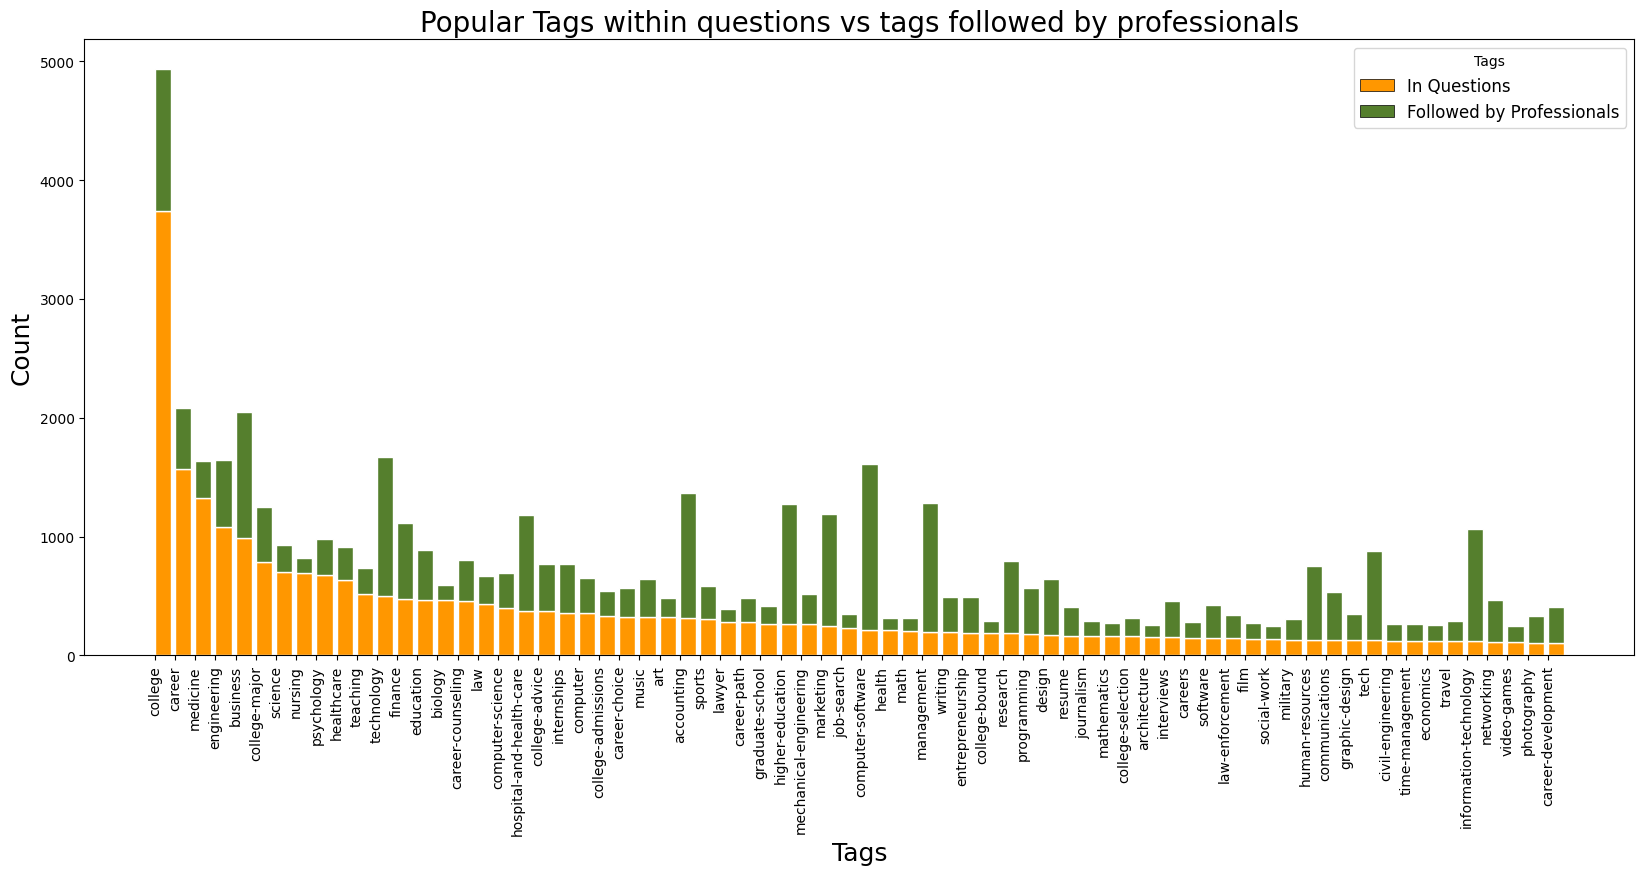

In [69]:
rc('font', size='10')
 
bars1 = tagcounts['TagsInQuestions'].tolist()
bars2 = tagcounts['TagsFollowedByProfessionals'].tolist()
 
bars = np.add(bars1, bars2).tolist()
 

r = list(range(0,len(tagcounts)))

names= taglist
barWidth = 0.8
 
plt.figure(figsize=(20, 8))  

plt.bar(r, bars1, color='#ff9700', edgecolor='white', align='edge', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white',align='edge', width=barWidth)

b1 = mpatches.Patch(facecolor='#ff9700', label='In Questions', linewidth = 0.5, edgecolor = 'black')
b2 = mpatches.Patch(facecolor='#557f2d', label = 'Followed by Professionals', linewidth = 0.5, edgecolor = 'black')
plt.legend(handles=[b1, b2], title="Tags", loc=1, fontsize='12', fancybox=True)


plt.xticks(r, names)
plt.xticks(rotation=90)
plt.xlabel("Tags", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Popular Tags within questions vs tags followed by professionals",fontsize=20)

plt.show()


#### Observation :- Most (Approx. ) of the questions have Tags within It

In [70]:
questions_received = matches.merge(right=emails, how = 'left',
                                            left_on ='matches_email_id',
                                            right_on ='emails_id')
emailsreceived = professionals.merge(right=emails, how = 'left',
                                            left_on ='professionals_id',
                                            right_on ='emails_recipient_id')
answersgiven_cnt = answers.groupby(['answers_author_id']).count()
answersgiven_cnt = answersgiven_cnt.sort_values('answers_author_id')
answersgiven_cnt = answersgiven_cnt.reset_index()
answersgiven_cnt = answersgiven_cnt.rename(columns={'answers_id': 'answers_given'})
answersgiven_cnt = answersgiven_cnt.drop(['answers_date_added','answers_body','answers_question_id'], axis=1)

questions_received_cnt = questions_received.groupby(['emails_recipient_id']).count()
questions_received_cnt = questions_received_cnt.sort_values('emails_recipient_id')
questions_received_cnt = questions_received_cnt.reset_index()
questions_received_cnt = questions_received_cnt.rename(columns={'emails_id': 'questions_received'})
questions_received_cnt = questions_received_cnt.drop(['matches_email_id','matches_question_id','emails_date_sent','emails_frequency_level'], axis=1)

emailsreceived_cnt = emailsreceived.groupby(['emails_recipient_id','professionals_date_joined','professionals_location','professionals_industry']).count()
emailsreceived_cnt = emailsreceived_cnt.sort_values('emails_recipient_id')
emailsreceived_cnt = emailsreceived_cnt.reset_index()
emailsreceived_cnt = emailsreceived_cnt.rename(columns={'emails_id': 'emails_received'})
emailsreceived_cnt = emailsreceived_cnt.drop(['professionals_id','professionals_headline','emails_date_sent','emails_frequency_level'], axis=1)

prof_e_q_det = emailsreceived_cnt.merge(questions_received_cnt, how='inner')
prof_e_q_det = prof_e_q_det.merge(answersgiven_cnt, how='left',
                                 left_on ='emails_recipient_id',
                                 right_on ='answers_author_id')
prof_e_q_det = prof_e_q_det.drop(['answers_author_id'],axis=1)
prof_e_q_det = prof_e_q_det.fillna(0)
prof_e_q_det.head()

,emails_recipient_id,professionals_date_joined,professionals_location,professionals_industry,emails_received,questions_received,answers_given
0,00009a0f9bda43eba47104e9ac62aff5,2016-03-14 17:00:48+00:00,"New York, New York",Media,14,15,3.0
1,000196ef8db54b9a86ae70ad31745d04,2018-05-15 20:27:44+00:00,Greater Chicago Area,Accounting,42,109,0.0
2,000d4635e5da41e3bfd83677ee11dda4,2016-04-27 16:38:34+00:00,"Nashville, Tennessee",Information Technology and Services,945,2335,3.0
3,000e2b5714444d79a672bf927905135c,2017-10-11 02:04:27+00:00,Greater Detroit Area,Financial Services,3,6,0.0
4,0018873fbf7742aba1bf13fff12cbfa4,2018-05-24 20:34:27+00:00,"Portland, Oregon Area",Financial Services,10,25,0.0


In [71]:
Data = [prof_e_q_det["questions_received"],prof_e_q_det["answers_given"]]

In [72]:
Data

[0          15
 1         109
 2        2335
 3           6
 4          25
          ... 
 19519       9
 19520      11
 19521      22
 19522     519
 19523      54
 Name: questions_received, Length: 19524, dtype: int64,
 0        3.0
 1        0.0
 2        3.0
 3        0.0
 4        0.0
         ... 
 19519    0.0
 19520    0.0
 19521    0.0
 19522    0.0
 19523    0.0
 Name: answers_given, Length: 19524, dtype: float64]

In [73]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=Data)
plt.xlabel('Questions recieved and Answer given')


NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

#### This KDE plot shows Question's recieved are less than Answer's given.
#### the maximum Answer given lies between 0 - 5, which shows very high peakedness in the plot.
#### Questions recieved are more skewed towards right side, which means distribution is spreaded from 0 to 3700 questions
#### Which means for single question there may be many answer by different view of different Professional's.

#### Summary of Professionals
##### With details like total number of email received, questions received answers given,Professionals Industries , Joining Date can be seen above

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(prof_e_q_det['questions_received'],prof_e_q_det['answers_given'],  color='k', s=25, alpha=0.2)
plt.xlim(-5, 90)
plt.ylim(-5,50)
plt.plot([-5,90], [-5,50], 'k-', color = 'r')

plt.xlabel('Questions Received')
plt.ylabel('Answers Given')
plt.title('Questions Received vs Answers Given by Professionals')
plt.legend()
plt.show()

#### Scatterplot for Questions Received vs Answers given
##### Shows that Majority of them have been sent large number of questions but response is low
##### Whereas some professionals have shown interest in answering more than questions being mailed

In [ ]:
answers_tags = answers.merge(right=tag_questions, how = 'inner',
                                            left_on ='answers_question_id',
                                            right_on ='tag_questions_question_id')
answers_tags = answers_tags.merge(right=tag_users, how = 'left',
                                            left_on =['tag_questions_tag_id','answers_author_id'],
                                            right_on =['tag_users_tag_id','tag_users_user_id'])

question_tags_followed = answers_tags.fillna(-1).groupby(['tag_questions_tag_id','tag_users_tag_id']).count()
question_tags_followed = question_tags_followed.sort_values('tag_questions_tag_id')
question_tags_followed = question_tags_followed.reset_index()
question_tags_followed = question_tags_followed.rename(columns={'answers_id': 'Count'})
question_tags_followed = question_tags_followed.merge(right=tags, how = 'inner',
                                            left_on ='tag_questions_tag_id',
                                            right_on ='tags_tag_id')
question_tags_followed = question_tags_followed.drop(['answers_author_id','answers_question_id','answers_date_added','answers_body','tag_questions_question_id','tag_users_user_id','tags_tag_id'], axis=1)
question_tags_followed.head(5)

#### Tags Count, name and Tag ID can be Seen above head of tag followed

In [ ]:
followed = question_tags_followed[question_tags_followed['tag_users_tag_id']>0]
notfollowed = question_tags_followed[question_tags_followed['tag_users_tag_id']<0]
foldf = pd.merge(followed, notfollowed, how='outer',
                                left_on='tag_questions_tag_id',
                                right_on='tag_questions_tag_id')
foldf['diff']=(foldf['Count_x']-foldf['Count_y']).abs()
foldf = foldf.sort_values('diff', ascending=False)
foldf=foldf.head(40)

In [ ]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

rc('font', size='10')
 
bars1 = foldf['Count_x']
bars2 = foldf['Count_y']

bars = np.add(bars1, bars2).tolist()
 
r = list(range(0,40))
 
names= foldf['tags_tag_name_x']
barWidth = 0.8
 
plt.figure(figsize=(20, 8)) 

plt.bar(r, bars1, color='#ff9700', edgecolor='white', align='edge', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white',align='edge', width=barWidth)

b1 = mpatches.Patch(facecolor='#ff9700', label='Followed', linewidth = 0.5, edgecolor = 'black')
b2 = mpatches.Patch(facecolor='#557f2d', label = 'Not Followed', linewidth = 0.5, edgecolor = 'black')
plt.legend(handles=[b1, b2], title="Question Tags", loc=1, fontsize='12', fancybox=True)

plt.xticks(r, names)
plt.xticks(rotation=90)
plt.xlabel("Tags", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Questions answered by professionals who followed tags or not",fontsize=20)

plt.show()

#### Stacked Bar chart to show top 40 tags
##### whether professionals followed it or not when they answered questions
##### This shows that there are majority of answers given by professionals without mail notification

In [ ]:
followedtags=followed.copy()
followedtags = followedtags[['tags_tag_name','Count']].sort_values('Count',ascending=True).tail(25)
followedtags.set_index('tags_tag_name', inplace=True)

ax = followedtags.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 tags followed by Professionals who answered", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Tag Names', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

#### College is the top tag came from Professionals who answered questions .
#### They mean to say Join college after particular education would be the best idea.(I assumed)

In [ ]:
notfollowedtags=answers_tags.copy()
notfollowedtags=notfollowedtags[notfollowedtags.tag_users_user_id.isnull()==True]
notfollowedtags = notfollowedtags.groupby(['answers_author_id','answers_id']).count()
notfollowedtags = notfollowedtags.reset_index()

notfollowedtags = notfollowedtags.groupby(['answers_author_id']).count()
notfollowedtags = notfollowedtags.rename(columns={'answers_id': 'Count'})
notfollowedtags = notfollowedtags.merge(right=professionals, how = 'inner',
                                            left_on ='answers_author_id',
                                            right_on ='professionals_id')
notfollowedtags = notfollowedtags.drop(['tag_questions_tag_id','tag_users_tag_id','answers_question_id','answers_date_added','answers_body','tag_questions_question_id','tag_users_user_id','professionals_headline'], axis=1)

notfollowedtags.head()

#### Summary of Professionals characterstics

In [74]:
notfollowedtags_industry=notfollowedtags.copy()
notfollowedtags_industry = notfollowedtags_industry.groupby(['professionals_industry'])['Count'].sum()
notfollowedtags_industry = notfollowedtags_industry.reset_index()
notfollowedtags_industry = notfollowedtags_industry.sort_values('Count',ascending=True).tail(25)
notfollowedtags_industry.set_index('professionals_industry', inplace=True)
ax = notfollowedtags_industry.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 industries of professionals who answered but did not follow tags", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Industries', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

NameError: name 'notfollowedtags' is not defined

In [75]:
notfollowedtags_location=notfollowedtags.copy()
notfollowedtags_location = notfollowedtags_location.groupby(['professionals_location'])['Count'].sum()
notfollowedtags_location = notfollowedtags_location.reset_index()
notfollowedtags_location = notfollowedtags_location.sort_values('Count',ascending=True).tail(25)
notfollowedtags_location.set_index('professionals_location', inplace=True)
ax = notfollowedtags_location.plot(kind='barh',figsize=(12, 8),width=0.8) 
ax.set_title("Top 25 Locations of professionals who answered but did not follow tags", fontsize=20)
ax.set_xlabel('Number of Professionals', fontsize=12)
ax.set_ylabel('Industries', fontsize=12)
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

NameError: name 'notfollowedtags' is not defined

#### Summary of Professionals characterstics
##### People who answered but without any mail notification of question or without following tags
##### They are the ones who are actively supporting students and are self motivated
#####  2 bar charts says
##### 1. Top Indusries these professionals belong to
##### 2. Top Locations these professionals come from

In [76]:
print("Count of Questions and columns - " + str(questions.shape))
print("Mail notifications sent for above questions - " + str(emails.shape))
print("Questions mailed in above mails - " + str(matches.shape))
print("Number of Questions for which mail notification sent - " + str(matches.matches_question_id.nunique()))

Count of Questions and columns - (23931, 5)
Mail notifications sent for above questions - (1850101, 4)
Questions mailed in above mails - (4316275, 2)
Number of Questions for which mail notification sent - 21894


#### Questions
##### Total Questions: 23,931
##### Mail notifications sent for above questions: 43,16,275 in 18,50,101 emails comprising of 1 or more questions
##### and mailed according to the email frequency level preference of Professionals. i.e. daily, immediate or weekly.
##### Out of total questions - 23931, matched for sending mail were 21894

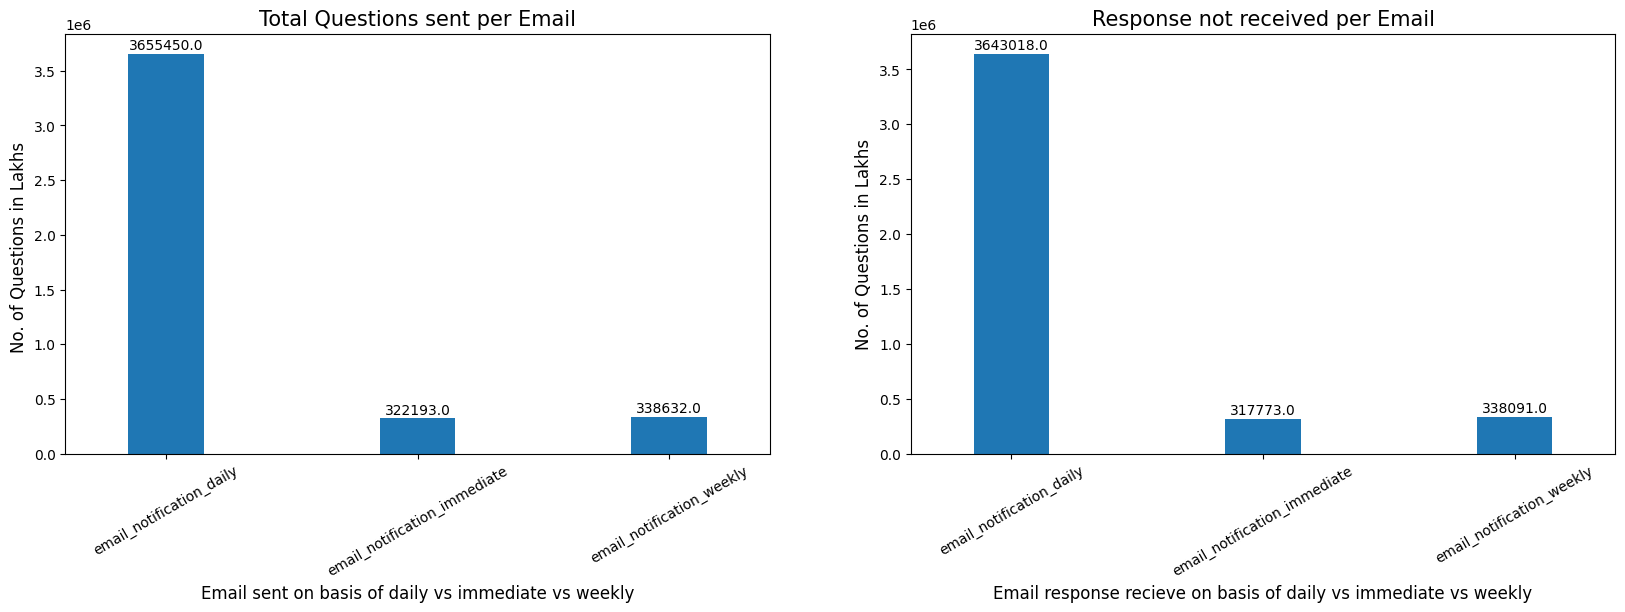

In [77]:
emails_matches = pd.merge(emails, matches, how='inner',
                               left_on='emails_id',
                               right_on='matches_email_id')
emails_response = pd.merge(emails_matches, answers, how='left',
                               left_on=['matches_question_id','emails_recipient_id'],
                               right_on=['answers_question_id','answers_author_id'])
emails_noresponse = emails_response[emails_response['answers_question_id'].isnull()]
emails_noresponse = emails_noresponse.groupby(['emails_frequency_level']).count()
emails_noresponse = emails_noresponse.rename(columns={'matches_question_id': 'Count'})
emails_noresponse = emails_noresponse.reset_index()

emails_freq_level_cnt = emails_matches.copy()
emails_freq_level_cnt = emails_freq_level_cnt.groupby(['emails_frequency_level']).count()
emails_freq_level_cnt = emails_freq_level_cnt.rename(columns={'matches_email_id': 'Count'})
emails_freq_level_cnt = emails_freq_level_cnt.drop(['emails_id','emails_recipient_id','emails_date_sent','matches_question_id'],axis=1)
emails_freq_level_cnt = emails_freq_level_cnt.reset_index()

plt.figure(figsize=(20,12))
ax1=plt.subplot(221)
emails_freq_level_cnt[['emails_frequency_level','Count']].plot(kind='bar', ax=ax1, legend=False, width=0.3)

ax1.set_title("Total Questions sent per Email", fontsize=15)
ax1.set_xticklabels(emails_freq_level_cnt['emails_frequency_level'], fontsize=10, rotation=30)
ax1.set_ylabel("No. of Questions in Lakhs ", fontsize=12)
ax1.set_xlabel("Email sent on basis of daily vs immediate vs weekly", fontsize=12)
add_value_labels(ax1,'N')

ax2=plt.subplot(222)
emails_noresponse[['emails_frequency_level','Count']].plot(kind='bar', ax=ax2, legend=False, width=0.3)

ax2.set_title("Response not received per Email", fontsize=15)
ax2.set_xticklabels(emails_noresponse['emails_frequency_level'], fontsize=10, rotation=30)
ax2.set_ylabel('No. of Questions in Lakhs', fontsize=12)
ax2.set_xlabel('Email response recieve on basis of daily vs immediate vs weekly', fontsize=12)

add_value_labels(ax2,'N')

#### Questions sent by mail or response received
##### for different email frequency as set by professionals
##### 1. Bar Chart for Count distribution
###### a. Questions sent as Mail Notification
###### b. Response received from those professionals

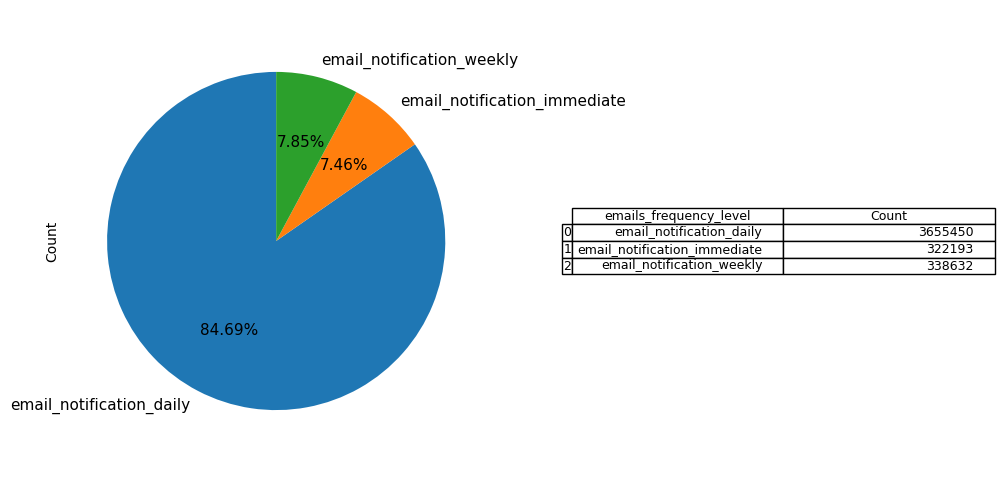

In [78]:
import matplotlib.pyplot as plt
from pandas.plotting import table
plt.figure(figsize=(12,6))

ax1 = plt.subplot(121, aspect='equal')
emails_freq_level_cnt.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.2f%%', 
 startangle=90, shadow=False, labels=emails_freq_level_cnt['emails_frequency_level'], legend = False, fontsize=11)

ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, emails_freq_level_cnt, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
plt.show()

##### Pie chart for % distribution
#### As we observed , Email Notification on Daily Basis is High than weekly and immediate forward.

C:\Users\Dell\AppData\Local\Temp\ipykernel_12756\432239785.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12756\432239785.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


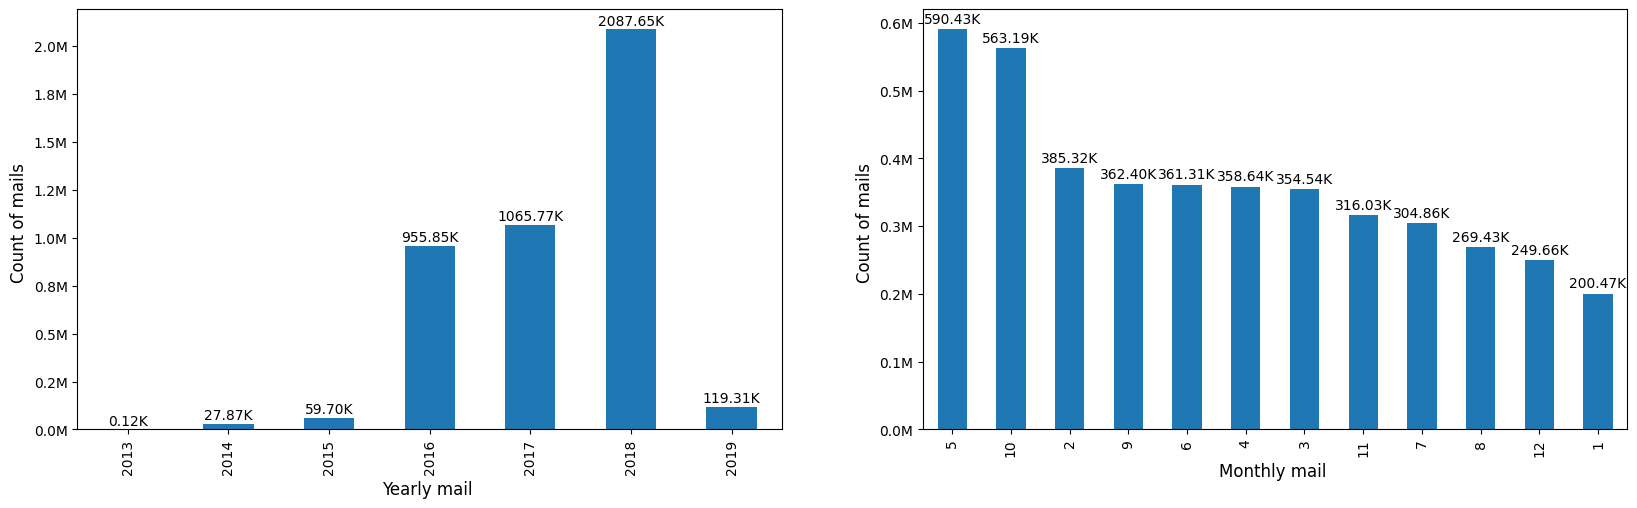

In [79]:
yearmonthwise_emails=emails_matches.copy()
yearmonthwise_emails['YearMailed']=yearmonthwise_emails['emails_date_sent'].dt.year
yearmonthwise_emails['MonthMailed']=yearmonthwise_emails['emails_date_sent'].dt.month

plt.figure(figsize=(20,12))
ax1=plt.subplot(221)
yearmonthwise_emails[['YearMailed','emails_date_sent']].groupby('YearMailed').count().sort_values('YearMailed').plot(kind='bar', ax=ax1, legend=False)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in ax1.get_yticks()/1000000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel("Count of mails ", fontsize=12)
ax1.set_xlabel("Yearly mail ", fontsize=12)
add_value_labels(ax1,'K')

ax2=plt.subplot(222)
yearmonthwise_emails[['MonthMailed','emails_date_sent']].groupby('MonthMailed').count().sort_values('emails_date_sent', ascending=False).plot(kind='bar', ax=ax2, legend=False)
ylabels = ['{:,.1f}'.format(y) + 'M' for y in ax2.get_yticks()/1000000]
ax2.set_yticklabels(ylabels)
ax2.set_ylabel("Count of mails ", fontsize=12)
ax2.set_xlabel("Monthly mail ", fontsize=12)
add_value_labels(ax2,'K',spacing=2)

#### The peak or highest value of E-mail Sent is 5 i.e May month of 2018 year. As you can see it is 590.43K.
This means that it is the Active year and Month for E-mail notifications

1. Year wise Questions sent
2. Month wise Questions sent
#### It shows that year or year more questions are mailed as it depends on tags professionals follow
#### And every year population of professionals seems to increase
#### It also shows that there are highest number of questions asked and hence highest mail notifications sent in month of May and October

In [80]:
answers_emails_response = emails_response[emails_response['answers_question_id'].isnull()==False]
answers_noemails_response=answers[~answers[['answers_question_id','answers_author_id']].apply(tuple,1).isin(emails_response[['matches_question_id','emails_recipient_id']].apply(tuple,1))]
print("Count of Answers and columns - " + str(answers.shape))
mcnt=emails_response[emails_response['answers_question_id'].isnull()==False].count()['emails_recipient_id']
print("Answers in response of Mail notifications - " + str(mcnt))
print("Number of Professionals who answered without Mail notifications - " + str(emails_response[emails_response['answers_question_id'].isnull()].emails_recipient_id.nunique()))
print("Number of Answers without Mail notifications - " + str(answers_noemails_response.count()['answers_id']))

Count of Answers and columns - (51123, 5)
Answers in response of Mail notifications - 17576
Number of Professionals who answered without Mail notifications - 21810
Number of Answers without Mail notifications - 33615


#### Total Count of Answers and columns - (51123, 5)
#### Answers in response of Mail notifications - 17576
#### Number of Professionals who answered without Mail notifications - 21810
#### Number of Answers without Mail notifications - 33615

C:\Users\Dell\AppData\Local\Temp\ipykernel_12756\2324586845.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No_Prior_Email_Sent' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  answers_noemails_response_prof.fillna('No_Prior_Email_Sent', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12756\2324586845.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No_Prior_Email_Sent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  answers_noemails_response_prof.fillna('No_Prior_Email_Sent', inplace=True)


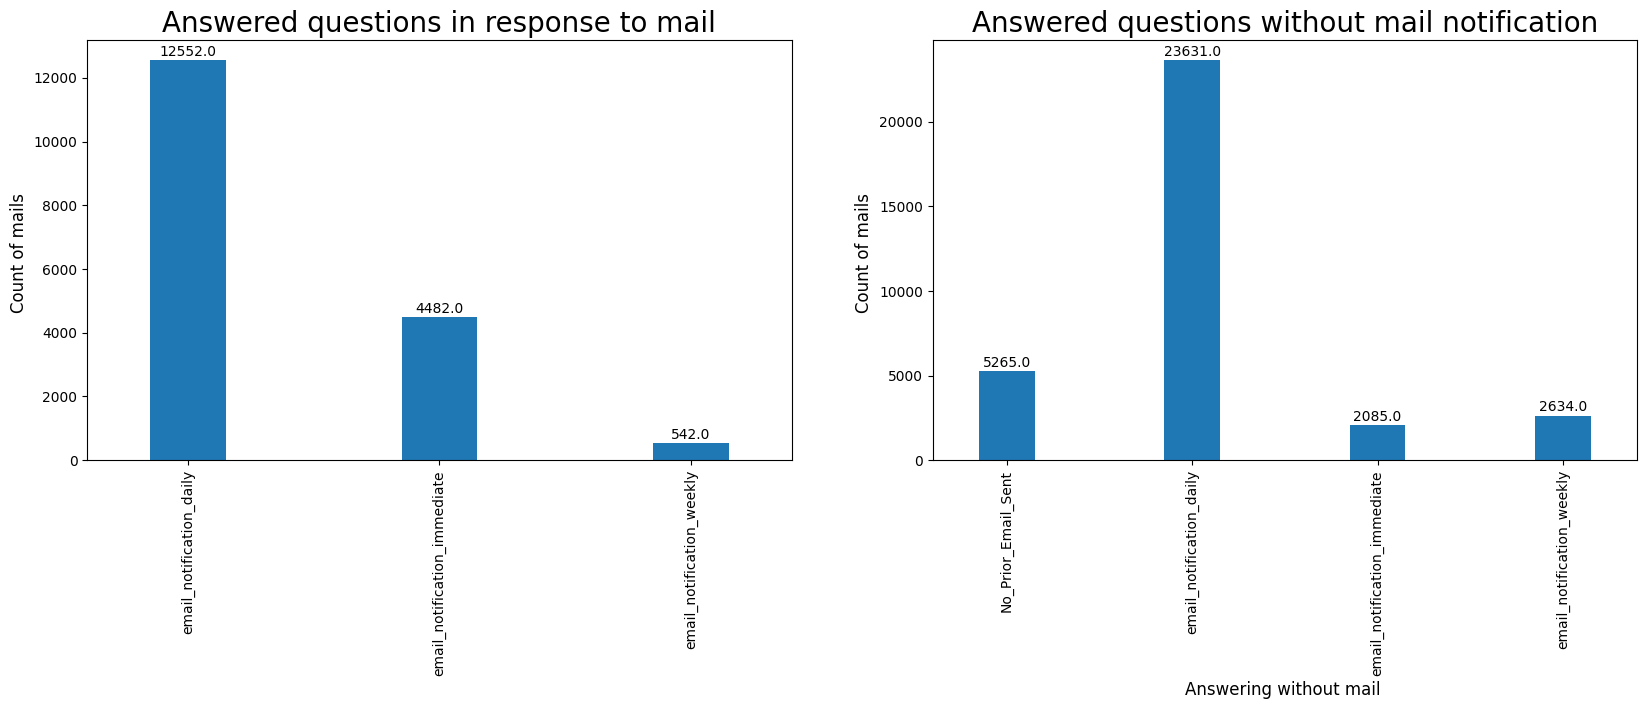

In [81]:
dfProf = emails.groupby('emails_recipient_id').first().reset_index()
answers_noemails_response_prof=answers_noemails_response.copy()
answers_noemails_response_prof = pd.merge(answers_noemails_response, dfProf, how = 'left',
                                    left_on='answers_author_id',
                                    right_on='emails_recipient_id')

answers_noemails_response_prof.fillna('No_Prior_Email_Sent', inplace=True)

plt.figure(figsize=(20,12))
ax1=plt.subplot(221)
answers_emails_response[['emails_frequency_level','answers_question_id']].groupby('emails_frequency_level').count().plot(kind='bar', ax=ax1, legend=False, width=0.3)
add_value_labels(ax1,'N')
ax1.set_title("Answered questions in response to mail", fontsize=20)
ax1.set_ylabel("Count of mails ", fontsize=12)
ax1.set_xlabel("Answering to mail ", fontsize=12)
ax1.set_xlabel('')

ax2=plt.subplot(222)
answers_noemails_response_prof[['emails_frequency_level','answers_id']].groupby('emails_frequency_level').count().plot(kind='bar', ax=ax2, legend=False, width=0.3)
ax2.set_xlabel('')
ax2.set_title("Answered questions without mail notification", fontsize=20)
ax2.set_ylabel("Count of mails ", fontsize=12)
ax2.set_xlabel("Answering without mail ", fontsize=12)
add_value_labels(ax2,'N')

####  Above can be seen that email notification with and without mailsent seems to be very high as compared to immediate and weekly mail sent
#### That means Professioanls are very much concerned about Career of Youth. See the massive peaked value of Answered question without mail notification. 

In [ ]:
questions_sent_mean_yearly = emails_matches.copy()
questions_sent_mean_yearly['YearSent']=questions_sent_mean_yearly['emails_date_sent'].dt.year
questions_sent_mean_yearly = questions_sent_mean_yearly.groupby(['YearSent','matches_question_id']).count().reset_index().groupby('YearSent')['emails_id'].mean()

answers_mean_yearly = answers.copy()
answers_mean_yearly = answers_mean_yearly.merge(questions, how='inner',
                                               left_on='answers_question_id',
                                               right_on='questions_id')
answers_mean_yearly['YearAsked']=answers_mean_yearly['questions_date_added'].dt.year
answers_mean_yearly = answers_mean_yearly.groupby(['YearAsked','answers_question_id']).count().reset_index().groupby('YearAsked')['questions_id'].mean()

plt.figure(figsize=(20,12))
ax1=plt.subplot(221)
ax1 = questions_sent_mean_yearly.plot(kind='barh',width=0.5) 
ax1.set_title("Average number of mails sent per question year wise", fontsize=15)
ax1.set_xlabel("Counts of mail in lakhs ", fontsize=12)
for p in ax1.patches:
     ax1.annotate(str("{:.2f}".format(p.get_width())), (p.get_width() * 1.005, p.get_y() * 1.005))

ax2=plt.subplot(222)
ax2 = answers_mean_yearly.plot(kind='barh',width=0.5) 
ax2.set_title("Average number of answers per question year wise", fontsize=15)
ax2.set_xlabel("Counts of mail in lakhs ", fontsize=12)
for p in ax2.patches:
     ax2.annotate(str("{:.2f}".format(p.get_width())), (p.get_width() * 1.005, p.get_y() * 1.005))

#### Observation from above shows.
#### Professionals have set different email frequency levels to receive notifications for questions asked by Students(Assumption).
#### Average Number of Answer per year asked was in 2011, and maximum average mail sent in 2018.

In [ ]:
questions_det_cnt = questions.copy()
questions_det_cnt['YearAsked']=questions_det_cnt['questions_date_added'].dt.year
questions_yrly_cnt = questions_det_cnt.groupby('YearAsked').count().reset_index()
questions_yrly_cnt = questions_yrly_cnt.rename(columns={'questions_id': 'questions_asked'})
questions_yrly_cnt = questions_yrly_cnt.drop(['questions_author_id','questions_date_added','questions_title','questions_body'],axis=1)

questions_yrly_cnt_notanswered = questions_det_cnt[~questions_det_cnt.questions_id.isin(answers.answers_question_id)][['YearAsked','questions_id']].groupby('YearAsked').count().reset_index()
questions_yrly_cnt_notanswered = questions_yrly_cnt_notanswered.rename(columns={'questions_id': 'not_answered'})

questions_yrly_cnt = questions_yrly_cnt.merge(questions_yrly_cnt_notanswered, how='left',
                                           left_on='YearAsked',
                                           right_on='YearAsked')

questions_yrly_cnt.fillna(0, inplace=True)


questions_yrly_cnt['percent_not_answered']= 100 * (questions_yrly_cnt['not_answered'] / questions_yrly_cnt['questions_asked'])
questions_yrly_cnt.head(10)

In [ ]:
questions_yrly_cnt_chart = questions_yrly_cnt.copy()
questions_yrly_cnt_chart = questions_yrly_cnt_chart.drop(['percent_not_answered'],axis=1)
plt.figure(figsize=(20,12))
ax1=plt.subplot(221)
questions_yrly_cnt_chart.groupby('YearAsked').sum().plot(kind='bar', ax=ax1, legend=True, width=0.5)

ax1.set_title("Questions Asked vs Questions Unanswered year wise", fontsize=20)
ax1.set_xlabel("Questions Asked vs Questions Unanswered ", fontsize=12)
ax1.set_ylabel("Counts of Response ", fontsize=12)
ax1.set_xlabel('')
add_value_labels(ax1,'N')


questions_yrly_cnt_chart=questions_yrly_cnt_chart[questions_yrly_cnt['not_answered']>0]

colors = ['yellowgreen','red','violet','lightskyblue','white','lightcoral']
x=questions_yrly_cnt_chart['YearAsked']
y=questions_yrly_cnt_chart['not_answered']
porcent = 100.*y/y.sum()

ax2=plt.subplot(222)
ax2, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(ax2, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("% Distribution of questions unanswered till date", fontsize=20)
sort_legend = True
if sort_legend:
    ax2, labels, dummy =  zip(*sorted(zip(ax2, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

#### 2018 is the highest % of not answering the notification or question . I may happen there may be more workload for them. 

In [ ]:
speedtoanswer = answers.copy()
speedtoanswer=speedtoanswer.sort_values(['answers_question_id','answers_date_added'], ascending=True).groupby('answers_question_id').first()
speedtoanswer=speedtoanswer.merge(questions, how='inner',left_on='answers_question_id',right_on='questions_id')
speedtoanswer['first_answer_days']=speedtoanswer['answers_date_added']-speedtoanswer['questions_date_added']
speedtoanswer['first_answer_days']=speedtoanswer['first_answer_days']/ np.timedelta64(1, 'D')
speedtoanswer['YearAsked']=speedtoanswer['questions_date_added'].dt.year
speedtoanswer=speedtoanswer.groupby('YearAsked')['first_answer_days'].mean()
speedtoanswer.head(10)

In [ ]:
plt.plot(speedtoanswer, color='orange')
plt.xlabel('Year Joined')
plt.ylabel('Average speed')
plt.title('Trend of average days to get first answer for the questions asked')
plt.show()

#### 2016 started new answer for the questions asked it looks above.
#### This shows 2016 was beginning for Career Guidance program for everyone who are in wait of Proper knowledge.
#### Above result shows that average number of days to get first answer is quite high as 40 days in 2018 and Career Village needs improvement in speed to answer and reduce the same to 1 day

In [ ]:
activitylevel_prof = answers.copy()
activitylevel_prof = activitylevel_prof.merge(professionals, how='inner',
                                             left_on='answers_author_id',
                                             right_on='professionals_id')
activitylevel_prof['ProfJoiningYear']=activitylevel_prof['professionals_date_joined'].dt.year
activitylevel_prof['TimeToAnswer']=(activitylevel_prof['answers_date_added']-activitylevel_prof['professionals_date_joined']).abs()
activitylevel_prof['TimeToAnswer']=activitylevel_prof['TimeToAnswer']/ np.timedelta64(1, 'D')
activitylevel_prof['WeekofAnswer']=round(activitylevel_prof['TimeToAnswer']/7,0)
activitylevel_prof=activitylevel_prof.groupby(pd.cut(activitylevel_prof['WeekofAnswer'],np.arange(0, 400, 25))).count()['answers_id']

ax = activitylevel_prof.plot.bar(rot=0, color="b", figsize=(20,6))
add_value_labels(ax,'N')
plt.xlabel('Week after joining')
plt.ylabel('Number of questions answered')
plt.title('Trend of number of questions answered by professionals since joining')
plt.show()

#### Trend of answering question by professionals
#### Above chart shows that professonals have answered a lot within 25 weeks of joining and later reduced as time passes by. After 25 weeks, professionals have shown 75%(approx.) decrease in responding to questions. This calls for some action from management to improve engagement level of professionals by introducing programs which can enhance and sustain motivation to help students

In [ ]:
ans_mailsent=emails_response[emails_response['answers_question_id'].isnull()==False][['answers_id','answers_question_id','answers_author_id','answers_date_added']]
ans_nomailsent=answers_noemails_response.copy()
ans_nomailsent=answers_noemails_response[['answers_id','answers_question_id','answers_author_id','answers_date_added']]
q_ans = questions.copy()
q_ans['YearAsked']=q_ans['questions_date_added'].dt.year
ans_mailsent=ans_mailsent.merge(q_ans, how='inner',
                               left_on='answers_question_id',
                               right_on='questions_id')
ans_mailsent['DaysToAnswer_MailSent']=ans_mailsent['answers_date_added']-ans_mailsent['questions_date_added']
ans_mailsent['DaysToAnswer_MailSent'] = ans_mailsent['DaysToAnswer_MailSent'] / np.timedelta64(1, 'D')
ans_mailsent=ans_mailsent.groupby('YearAsked')['DaysToAnswer_MailSent'].mean().reset_index()

ans_nomailsent=ans_nomailsent.merge(q_ans, how='inner',
                               left_on='answers_question_id',
                               right_on='questions_id')
ans_nomailsent['DaysToAnswer_NoMailSent']=ans_nomailsent['answers_date_added']-ans_nomailsent['questions_date_added']
ans_nomailsent['DaysToAnswer_NoMailSent'] = ans_nomailsent['DaysToAnswer_NoMailSent'] / np.timedelta64(1, 'D')
ans_nomailsent=ans_nomailsent.groupby('YearAsked')['DaysToAnswer_NoMailSent'].mean().reset_index()

ans_avgspeedtoanswer = ans_nomailsent.merge(ans_mailsent, how='outer',
                                           left_on='YearAsked',
                                           right_on='YearAsked')
ans_avgspeedtoanswer.set_index('YearAsked')

In [ ]:
ans_avgspeedtoanswer.plot(x='YearAsked', y=['DaysToAnswer_NoMailSent', 'DaysToAnswer_MailSent'], color=['green','blue'])
plt.xlabel('Year When Question Added')
plt.ylabel('Average speed to Answer')
plt.title('Trend of average days taken to answer when mail sent and without mail notification')
plt.show()

#### Above chart shows that initially in 2011 and 2012 when no mails were sent, the average days taken to answer was very high. In Year 2013 and 2014 when mails were sent, the speed to answer increased when mail sent but eventually 2016 onwards people getting mails took more time to answer compared to professionals who were themselves searching for relevant questions and answering them. For Career Village there needs to be improvement in this area so that professionals are not demotivated by number of mails or irrelevant matches and hence response time should not be decrease.

In [ ]:
answers_prof_student_loc = answers.copy()
answers_prof_student_loc = answers_prof_student_loc.merge(professionals, how='inner',
                                                         left_on='answers_author_id',
                                                         right_on='professionals_id')
answers_prof_student_loc = answers_prof_student_loc.merge(questions, how='inner',
                                                         left_on='answers_question_id',
                                                         right_on='questions_id')
answers_prof_student_loc = answers_prof_student_loc.merge(students, how='inner',
                                                         left_on='questions_author_id',
                                                         right_on='students_id')
answers_prof_student_loc = answers_prof_student_loc[['professionals_location', 'professionals_industry','students_location']]


answers_prof_ind_loc = answers_prof_student_loc.groupby(['professionals_industry','professionals_location']).count().reset_index()
answers_prof_ind_loc = answers_prof_ind_loc.groupby(['professionals_industry']).count()['professionals_location'].reset_index()
answers_prof_ind_loc = answers_prof_ind_loc.rename(columns={'professionals_location': 'ProfessionalCount'})


answers_stud_ind_loc = answers_prof_student_loc.groupby(['professionals_industry','students_location']).count().reset_index()
answers_stud_ind_loc = answers_stud_ind_loc.groupby(['professionals_industry']).count()['students_location'].reset_index()
answers_stud_ind_loc = answers_stud_ind_loc.rename(columns={'students_location': 'StudentCount'})

industrywise_locations = answers_stud_ind_loc.merge(answers_prof_ind_loc, how='outer',
                                                   left_on='professionals_industry',
                                                   right_on='professionals_industry')
industrywise_locations=industrywise_locations.sort_values('ProfessionalCount', ascending=False).head(50)
industrywise_locations.head(10)

#### Industrywise Unique Locations where answers come from , with Studentcount and Professionalcount

In [ ]:

rc('font', size='10')
 
bars1 = industrywise_locations['ProfessionalCount']
bars2 = industrywise_locations['StudentCount']


bars = np.add(bars1, bars2).tolist()

r = list(range(0,50))
names= industrywise_locations['professionals_industry']
barWidth = 0.8
 
plt.figure(figsize=(20, 8))  

plt.bar(r, bars1, color='#ff9700', edgecolor='white', align='edge', width=barWidth)

plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white',align='edge', width=barWidth)

b1 = mpatches.Patch(facecolor='#ff9700', label='Unique Professional Locations', linewidth = 0.5, edgecolor = 'black')
b2 = mpatches.Patch(facecolor='#557f2d', label = 'Unique Student Locations', linewidth = 0.5, edgecolor = 'black')
plt.legend(handles=[b1, b2], title="Question Tags", loc=1, fontsize='12', fancybox=True)

plt.xticks(r, names)
plt.xticks(rotation=90)
plt.xlabel("Industry", fontsize=18)
plt.ylabel("Unique Locations", fontsize=18)
plt.title("Number of Unique locations of professionals and students industry wise",fontsize=20)

plt.show()

#### Above chart has data from questions and answers Career Village has received. There seems to be some coo-relation between Professionals industry and location they come from. For professionals who have answered and helped students. We see that with the students ask questions which belong to any domain but they came from many different locations across the globe but professionals from a particular industry answering questions come from comparatively very less unique locations. This can be one of the input to recommendation engine while coming up with a model to send relevant questions to professionals
#### In short if Particular question is asked , then there are high chances of getting answer from that respective professional domain. this shows clear representation of respective Domain or Industry.  

## CONCLUSIONS OF EDA
#### 1). Professionals from industry like Telecommunications, Information Technology and computer software aqcuires the entire distribution in the Analysis.

#### 2). Majority of professionals are from US and second highest location is from INDIA.

#### 3). There is a step increase in professionals from 2016 onwards with the same dominant industries and locations from above 2 points.

#### 4). There was a sudden increase in students in year 2016 but did not consistently increase later.

#### 5). Students are dominantly from US but also have couple of places in India like Bengalaru and Chennai where count is finely shown.

#### 6). There is no correlation between locations where the questions come from and locations where it has been answered by professionals.

#### 7). There seems to be correlation between locations and industries of professionals where we see a particular industry professionals came from some specific locations and are not spread across the entire globe compared to Students data.

#### 8). Professionals have joined groups more than students but not necessarily answered questions from students of same group.

#### 9). Question tags are the way to invite answers from professionals who follow tags but 70% of answered where received from professionals who did not follow tags or received mail (That is a good innotiative taken by experienced person).

#### 10). There are some popular question tags like college, career, business, doctor, science which are very common and not followed as much by professionals guides.

#### 11). There is a evidence that large number of mails and questions are being sent to professionals and there is almost no responses from many of them after being engaged with CV for a while

#### 12). There are some industry related tags like telecommunications, computer software, information technology which are followed by professionals, but questions are not tagged by such industry specific tags (May be because of less confident among industry or excess workload).

#### 13). Industry synonym tags are followed by max professionals and answered highest when tagged in question.

#### 14). Professionals from industries like Telecommunications, Technology Start-ups, Research / Education etc shows average time taken to answer question.

#### 15). There is 40 % chance of responding to mails by professionals to answer which is very low.

#### 16). 75% of questions are mailed for email frequency set daily and of which 90% of time there is no response(May be because mails are not relevant, getting too much of mails or too many questions etc).

#### 17). There is big problem over some questions not being answered and the percentage seems to be increasing year after year.

#### 18). Also to note that people answering without mail notifications are maximum where daily email frequency level set. This shows that there is huge gap in sending relevant matches to professionals. It’s not only the professional’s activity which is low but serious improvement needed in email recommendations engine.

#### 19). Professionals activity level is pretty much good in initial days of year of joining and engagement of some professionals degrades after few months.

### Our Aim is to :-
                      a). Reduce number of unnesscaery mail notifications sent per question.
                      b). Increase relevant matches for questions and increase response rate
                          i). So that all questions gets minimum 1 answer and Questions receive quality response.
                      c). Decrease average days (time) taken to answer.

## Note :- Observations may vary from viewer to viewer prospective's.

## My aim in this case study is to achieve above a,b,c points to increase productionisation with Quality of answers for everyone (not precise to Only student's but also for Professionals [some time they also need help]).

## After all the EDA we will combine some features (which i will show that in implementation of recommendation engine). And create checkpoints for two files(professional_info and questions_info).

## Then at end it will show recommendation by our model.